In [35]:
from random import *
import vectors
from math import *
import pygame
import numpy as np
from vectors import *
from asteroids import PolygonModel
from draw2d import *

In [2]:
class PolygonModel():
    def __init__(self,points):
        self.points=points
        self.rotation_angle=0
        self.x=0
        self.y=0
    def transformed(self):
        rotated = [vectors.rotate2d(self.rotation_angle, v) for v in self.points]
        return [vectors.add((self.x,self.y),v) for v in rotated]
    def does_intersect(self,segment):
        pass

In [3]:
class Ship(PolygonModel):
    def __init__(self):
        super().__init__([(0.5,0),(-0.25,0.25),(-0.25,-0.25)])

In [4]:
class Asteroids(PolygonModel):
    def __init__(self):
        sides=randint(5,9)
        vs=[vectors.to_cartesian((uniform(0.5,1.0),2*pi*i/sides))for i in range(0,sides)]
        super().__init__(vs)

In [5]:
ship=Ship()
asteroid_count=10
asteroids=[Asteroids() for _ in range(0,asteroid_count)]

for ast in asteroids:
    ast.x=randint(-9,9)
    ast.y=randint(-9,9)    

In [6]:
width,height=400,400
def to_pixels(x,y):
    return (width/2+width*x/20,height/2-height*y/20)

In [7]:
GREEN=(0,255,0)
def draw_poly(screen,polygon_model,color=GREEN):
    pixel_points=[to_pixels(x,y) for x,y in polygon_model.transformed()]
    pygame.draw.aalines(screen,color,True,pixel_points,10)

In [8]:
class Ship(PolygonModel):
    def __init__(self):
        super().__init__([(0.5,0),(-0.25,0.25),(-0.25,-0.25)])
    def laser_segment(self):
        dist=20.*sqrt(2)
        x,y=self.transformed()[0]
        return ((x,y),
               (x+dist*cos(self.rotation_angle),
               y+dist*sin(self.rotation_angle)))

In [9]:
RED=(255,0,0)
def draw_segment(screen, v1,v2,color=RED):
    pygame.draw.aaline(screen,color,to_pixels(*v1), to_pixels(*v2),10)

In [10]:
# ship=Ship()
# asteroid_count=10
# asteroids=[Asteroids() for _ in range(0,asteroid_count)]

# for ast in asteroids:
#     ast.x=randint(-9,9)
#     ast.y=randint(-9,9)    

# laser=ship.laser_segment()
# keys=pygame.key.get_pressed()
# if keys[pygame.K_SPACE]:
#     draw_segment(*laser)
# for asteroid in asteroids:
#     if asteroid.does_intersect(segment):
#         asteroids.remove(asteroid)

In [11]:
matrix=np.array(((-1,1),(1,2)))
output=np.array((0,8))

In [12]:
np.linalg.solve(matrix,output)

array([2.66666667, 2.66666667])

In [13]:
def standard_form(v1,v2):
    x1,y1=v1
    x2,y2=v2    
    a=y2-y1
    b=x1-x2
    c=x1*y2-x2*y1
    return a,b,c

In [14]:
def intersection(u1,u2,v1,v2):
    a1,b1,c1=standard_form(u1,u2)
    a2,b2,c2=standard_form(v1,v2)    
    m=np.array(((a1,b1),(a2,b2)))
    c=np.array((c1,c2))
    return np.linalg.solve(m,c)

In [15]:
def do_segments_intersect(s1,s2):
    u1,u2=s1
    v1,v2=s2
    d1,d2=distance(*s1),distance(*s2)
    x,y=intersection(u1,u2,v1,v2)
    return (distance(u1,(x,y))<=d1 and
               distance(u2,(x,y))<=d1 and
               distance(v1,(x,y))<=d2 and
               distance(v2,(x,y))<=d2)

In [16]:
class PolygonModel():
    def __init__(self,points):
        self.points=points
        self.rotation_angle=0
        self.x=0
        self.y=0
        
    def transformed(self):
        rotated = [vectors.rotate2d(self.rotation_angle, v) for v in self.points]
        return [vectors.add((self.x,self.y),v) for v in rotated]
    
    def segments(self):
        point_count=len(self.points)
        points=self.transformed()
        return [(points[i],points[(i+1)%point_count])
               for i in range(0,point_count)]
    
    def does_intersect(self,other_segment):
        for segment in self.segments():
            if do_segments_intersect(other_segment,segment):
                return True
        return False

In [17]:
# error：奇异矩阵
# m=np.array(((2,1),(4,2)))
# v=np.array((6,4))
# np.linalg.solve(m,v)

In [18]:
def do_segments_intersect(s1,s2):
    u1,u2=s1
    v1,v2=s2
    l1,l2=distance(*s1),distance(*s2)
    try:
        x,y=intersection(u1,u2,v1,v2)
        return (distance(u1,(x,y))<=l1 and
                   distance(u2,(x,y))<=l1 and
                   distance(v1,(x,y))<=l2 and
                   distance(v2,(x,y))<=l2)
    except np.linalg.linalg.LinAlgError:
        return False

In [19]:
def segmenr_checks(s1,s2):
    u1,u2=s1
    v1,v2=s2
    l1,l2=distance(*s1),distance(*s2)
    x,y=intersection(u1,u2,v1,v2)
    return [distance(u1,(x,y))<=l1,
               distance(u2,(x,y))<=l1,
               distance(v1,(x,y))<=l2,
               distance(v2,(x,y))<=l2]

In [20]:
segmenr_checks(((-3,0),(-1,0)),((0,-1),(0,1)))

[False, True, True, True]

In [21]:
segmenr_checks(((1,0),(3,0)),((0,-1),(0,1)))

[True, False, True, True]

In [22]:
segmenr_checks(((-1,0),(1,0)),((0,-3),(0,-1)))

[True, True, False, True]

In [23]:
segmenr_checks(((-1,0),(1,0)),((0,1),(0,3)))

[True, True, True, False]

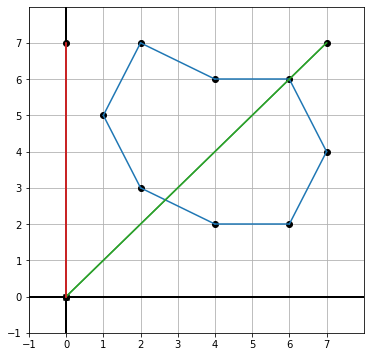

In [24]:
asteroid_points=[(2,7),(1,5),(2,3),(4,2),(6,2),(7,4),(6,6),(4,6)]
laser_points=[(0,0),(7,7)]
missing_laser_points=[(0,0),(0,7)]
draw2d(
    Points2D(*asteroid_points),
    Polygon2D(*asteroid_points),
    Points2D(*laser_points),
    Polygon2D(*laser_points,color=green),
    Points2D(*missing_laser_points),
    Polygon2D(*missing_laser_points,color=red)
)

In [25]:
asteroid=PolygonModel([(2,7),(1,5),(2,3),(4,2),(6,2),(7,4),(6,6),(4,6)])

In [26]:
asteroid.does_intersect([(0,0),(7,7)])

True

In [27]:
asteroid.does_intersect([(0,0),(0,7)])

False

In [28]:
def do_segments_intersect(s1,s2):
    u1,u2=s1
    v1,v2=s2
    l1,l2=distance(*s1),distance(*s2)
    try:
        x,y=intersection(u1,u2,v1,v2)
        return (distance(u1,(x,y))<=l1 and
                   distance(u2,(x,y))<=l1 and
                   distance(v1,(x,y))<=l2 and
                   distance(v2,(x,y))<=l2)
    except np.linalg.linalg.LinAlgError:
        return False

class PolygonModel():
    def __init__(self,points):
        self.points=points
        self.rotation_angle=0
        self.x=0
        self.y=0
        
    def transformed(self):
        rotated = [vectors.rotate2d(self.rotation_angle, v) for v in self.points]
        return [vectors.add((self.x,self.y),v) for v in rotated]
    
    def   (self):
        point_count=len(self.points)
        points=self.transformed()
        return [(points[i],points[(i+1)%point_count])
               for i in range(0,point_count)]
    
    def does_intersect(self,other_segment):
        for segment in self.segments():
            if do_segments_intersect(other_segment,segment):
                return True
        return False
    
    def does_collide(self,other_poly):
        for other_segment in other_poly.segments():
            if self.does_intersect(other_segment):
                return True
        return False

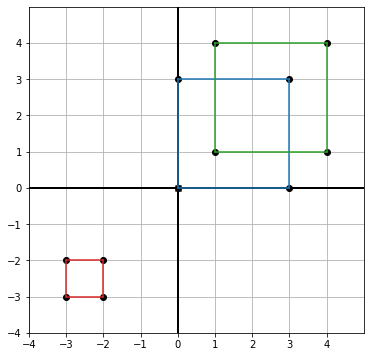

In [33]:
asteroid_points=[(2,7),(1,5),(2,3),(4,2),(6,2),(7,4),(6,6),(4,6)]
laser_points=[(0,0),(7,7)]
missing_laser_points=[(0,0),(0,7)]
draw2d(
    Points2D(*[(0,0),(3,0),(3,3),(0,3)]),
    Polygon2D(*[(0,0),(3,0),(3,3),(0,3)]),
    Points2D(*[(1,1),(4,1),(4,4),(1,4)]),
    Polygon2D(*[(1,1),(4,1),(4,4),(1,4)],color=green),
    Points2D(*[(-3,-3),(-2,-3),(-2,-2),(-3,-2)]),
    Polygon2D(*[(-3,-3),(-2,-3),(-2,-2),(-3,-2)],color=red)
)

In [30]:
square1=PolygonModel([(0,0),(3,0),(3,3),(0,3)])
square2=PolygonModel([(1,1),(4,1),(4,4),(1,4)])
square1.does_collide(square2)

True

In [31]:
square3=PolygonModel([(-3,-3),(-2,-3),(-2,-2),(-3,-2)])
square1.does_collide(square3)

False

In [34]:
matrix=np.array(((1,1,-1),(0,2,-1),(1,0,1)))
vector=np.array((-1,3,2))
np.linalg.solve(matrix,vector)

array([-1.,  3.,  3.])

In [36]:
def plane_equation(p1,p2,p3):
    parallel1=subtract(p2,p1)
    parallel2=subtract(p3,p1)   
    a,b,c=cross(parallel1,parallel2)
    d=dot((a,b,c),p1)
    return a,b,c,d

In [37]:
plane_equation((1,1,1),(3,0,0,),(0,3,0))

(3, 3, 3, 9)

In [39]:
matrix=np.array(((0,0,0,0,1),(0,1,0,0,0),(0,0,0,1,0),(1,0,0,0,0),(1,1,1,0,0),))
vector=np.array((3,1,-1,0,-2))
np.linalg.solve(matrix,vector)

array([ 0.,  1., -3., -1.,  3.])

In [41]:
matrix=np.array(((1,1,-1),(0,2,-1),(1,0,1)))
vector=np.array((-1,3,2))
inverse=np.linalg.inv(matrix)
inverse

array([[ 0.66666667, -0.33333333,  0.33333333],
       [-0.33333333,  0.66666667,  0.33333333],
       [-0.66666667,  0.33333333,  0.66666667]])

In [42]:
np.matmul(inverse,matrix)

array([[ 1.00000000e+00,  1.11022302e-16, -1.11022302e-16],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [43]:
np.matmul(inverse,vector)

array([-1.,  3.,  3.])

In [44]:
w=np.array((1,3,-7))
a=np.array(((1,-1,0),(0,-1,-1),(1,0,2)))
np.linalg.solve(a,w)

array([ 3.,  2., -5.])

In [45]:
np.matmul(np.linalg.inv(a),w)

array([ 3.,  2., -5.])

In [46]:
matrix=np.array(((10,3),(1,2)))
vector=np.array((5,5))
np.linalg.solve(matrix,vector)

array([-0.29411765,  2.64705882])

In [51]:
answer=np.array((-0.29411765,  2.64705882))
np.matmul(matrix,answer)

array([4.99999996, 4.99999999])

In [52]:
matrix=np.array(((0,0,1,1),(0,-2,-1,-1),(1,-2,0,2),(0,0,-2,1)))
vector=np.array((3,0,6,9))
np.linalg.solve(matrix,vector)

array([-7. , -1.5, -2. ,  5. ])

In [53]:
answer=np.array((-7,-1.5,-2,5))
np.matmul(matrix,answer)

array([3., 0., 6., 9.])